# Load RMSEs

In [15]:
import pickle
with open('RMSE_Layer2_NN.dat','rb') as f:
    RMSE_Layer2_NN = pickle.load(f)
f.close()

with open('RMSE_Layer0_NN.dat','rb') as f:
    RMSE_Layer0_NN = pickle.load(f)
f.close()

with open('RMSE_Layer2_LNN.dat','rb') as f:
    RMSE_Layer2_LNN = pickle.load(f)
f.close()

with open('RMSE_Layer0_LNN.dat','rb') as f:
    RMSE_Layer0_LNN = pickle.load(f)
f.close()


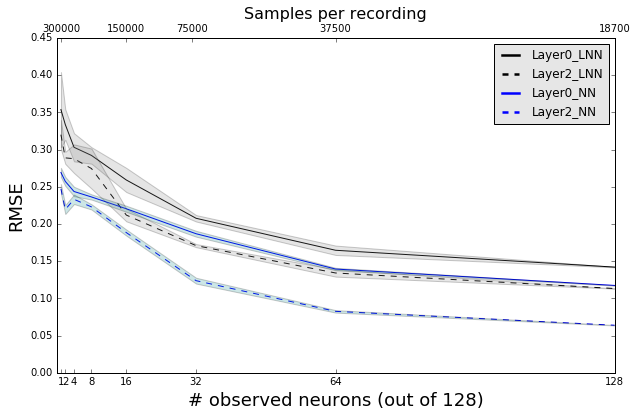

In [44]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np

fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, 128])
ax2 = ax1.twiny()

x = [2**x for x in range(8)]


y = np.mean(np.median(RMSE_Layer0_LNN, axis=1), axis=0)
error = np.std(np.mean(RMSE_Layer0_LNN, axis=1), axis=0)
ax1.plot(x, y, 'k-', label='Layer0_LNN')
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#808080')

y = np.mean(np.median(RMSE_Layer2_LNN, axis=1), axis=0)
error = np.std(np.mean(RMSE_Layer2_LNN, axis=1), axis=0)
ax1.plot(x, y, 'k--', label='Layer2_LNN')
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#848484')

y = np.mean(np.median(RMSE_Layer0_NN, axis=1), axis=0)
error = np.std(np.mean(RMSE_Layer0_NN, axis=1), axis=0)
ax1.plot(x, y, 'b-', label='Layer0_NN')
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#008080')

y = np.mean(np.median(RMSE_Layer2_NN, axis=1), axis=0)
ax1.plot(x, y, 'b--', label='Layer2_NN')
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#048484')


ax1.set_xlabel('# observed neurons (out of 128)', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=16)

new_tick_locations = x
ax1.set_xlim(ax1.get_xlim())
ax1.set_xticks(new_tick_locations)
ax1.set_xticklabels(new_tick_locations)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.set_ylim([0, .45])

legend = ax1.legend(loc='upper right', shadow=False)

frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(2.5)  # the legend line width


new_tick_locations = [1,16,31,64,128]
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
nSamples = [300000, 150000, 75000, 37500, 18700]
ax2.set_xticklabels(nSamples)

#bl = np.std(layer_outs_test[oLayer]-np.mean(layer_outs_test[oLayer]));
# horiz_line_data = np.array([bl for i in xrange(len(x))])
# pl.plot(x, horiz_line_data, 'k--') 
# pl.text(110,bl+0.005, 'baseline')

pl.draw()
pl.savefig('RMSEs.pdf', format='pdf')
pl.savefig('RMSEs.eps', format='eps', dpi=1000)